# Download and plot time-series data on COVID-19 cases 

Johns Hopkins (a university that does a lot of medical research) makes a dataset available on COVID-19 cases, and they update it every day. 

They put it online in [this GitHub repository](https://github.com/CSSEGISandData/COVID-19). So, we can download the current data at any time and plot the number of COVID-19 cases in any part of the world, as a function of date.

Let's do that.

If you get bored with the barplots, there are some lineplots comparing different parts of the world at the bottom.

In [1]:
# import a bunch of stuff

# this is for plotting
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

# this is for dealing with data
import pandas as pd

# this is for downloading the dataset
import requests

# this is for treating the downloaded dataset like a file
from io import StringIO

In [2]:
# Here's the direct URL for the dataset I want
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
# Download the dataset
r = requests.get(url)

# Trick Pandas into thinking the downloaded dataset, which is a binary-formatted 
# string, is a file. Then load the dataset into Pandas.
response_as_file = StringIO(r.content.decode("utf-8"))
df_timeseries = pd.read_csv(response_as_file)

In [3]:
# show the first 10 rows of the dataset
df_timeseries[:10]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,59,70,75,82,114,147,177,212,272,322
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,639,639,701,773,839,825,878,889,924,963
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,178,178,200,212,226,243,266,313,345,385
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,149,149,197,238,428,566,673,790,900,1030
5,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,...,39,46,64,64,73,103,103,186,231,271
6,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,65,65,92,112,134,171,210,267,307,353
7,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,21,21,36,49,57,71,94,121,121,121
8,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,20,20,35,46,61,68,78,94,144,184
9,NaN,Cambodia,11.5500,104.9167,0,0,0,0,0,1,...,3,3,5,7,7,7,33,35,37,51


In [4]:
# Let's see what Country/Region values we can find data for
df_timeseries["Country/Region"].value_counts()

US                                  247
China                                33
Canada                               11
France                                9
Australia                             9
United Kingdom                        7
Netherlands                           4
Denmark                               3
Liechtenstein                         1
Czechia                               1
Belarus                               1
Bahrain                               1
Bhutan                                1
Honduras                              1
New Zealand                           1
Panama                                1
Mauritania                            1
Central African Republic              1
Sri Lanka                             1
Gabon                                 1
Nigeria                               1
Ethiopia                              1
Congo (Kinshasa)                      1
Azerbaijan                            1
Kazakhstan                            1


In [5]:
# Each row in the dataset (shown above) is a count of cases in a geographic region.

# For the data to display, we want the columns with dates as names. Those are our counts of 
# cases in each geographic region.
# Counting from 0, the indexes of the columns that we want are the ones with index 4
# (1/22/20) and higher.
date_columns = df_timeseries.columns[4:]

def plot_casecount_by_date(df, title):
    """
    Make a barplot of the case counts by date, for a dataset containing all the rows
    from a region of interest
    """
    sums = [df[column].sum() for column in date_columns]
    f, ax = plt.subplots()
    matplotlib.pyplot.xticks(rotation=90)
    ax.set_title(title)
    sns.barplot(x=date_columns, y=sums, ax=ax)
    f.set_size_inches(14,6)

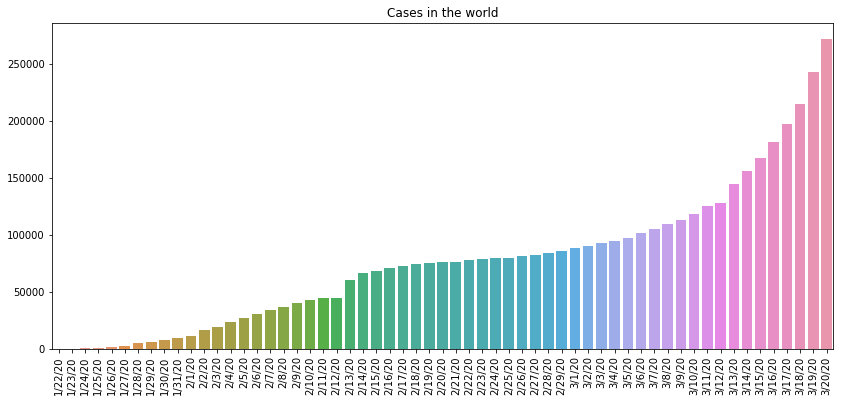

In [6]:
# to plot all the cases in the world, send our function the entire dataset
plot_casecount_by_date(df_timeseries, "Cases in the world")

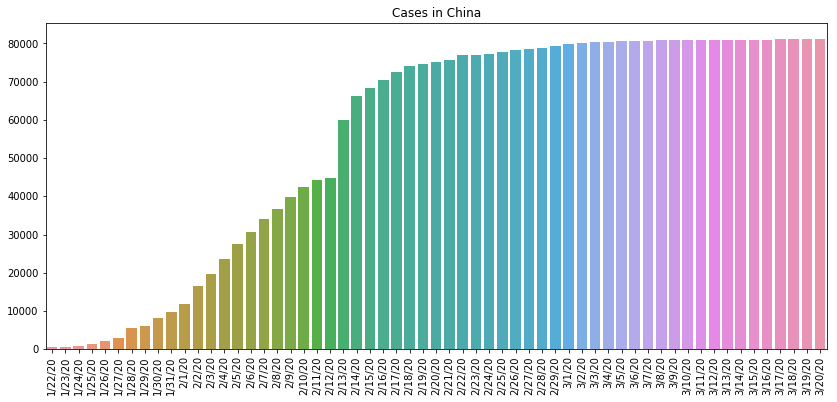

In [7]:
# to plot the cases in China, give our function all the rows 
# where Country/Region is China
df_china = df_timeseries[df_timeseries['Country/Region'] == 'China']
plot_casecount_by_date(df_china, "Cases in China")

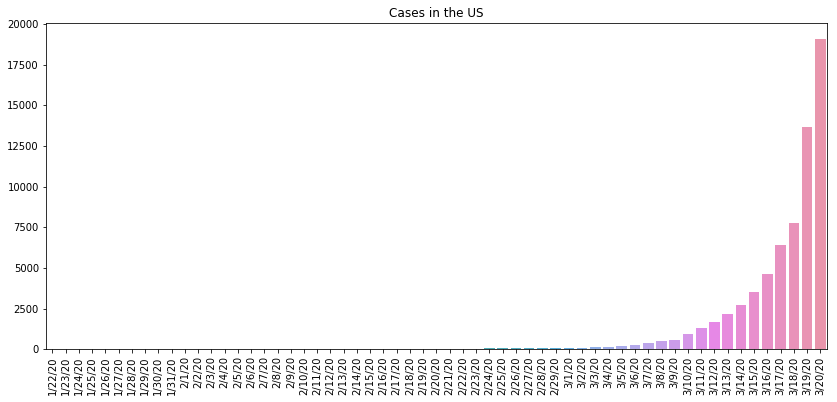

In [8]:
df_US = df_timeseries[df_timeseries['Country/Region'] == 'US']
plot_casecount_by_date(df_US, "Cases in the US")

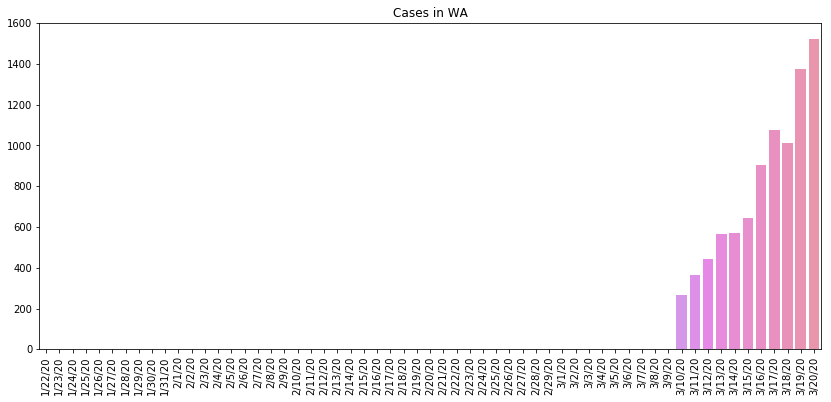

In [28]:
df_wa = df_timeseries[df_timeseries['Province/State'] == 'Washington']
plot_casecount_by_date(df_wa, "Cases in WA")

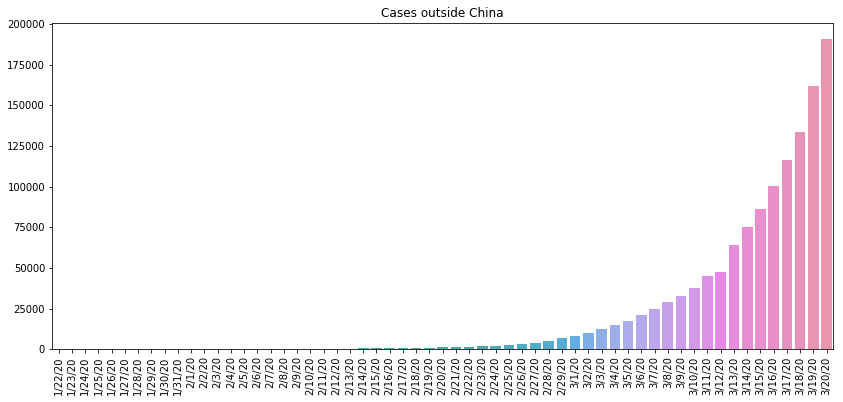

In [11]:
# to plot the cases in China, give our function all the rows 
# where Country/Region is China
df_notchina = df_timeseries[df_timeseries['Country/Region'] != 'China']
plot_casecount_by_date(df_notchina, "Cases outside China")

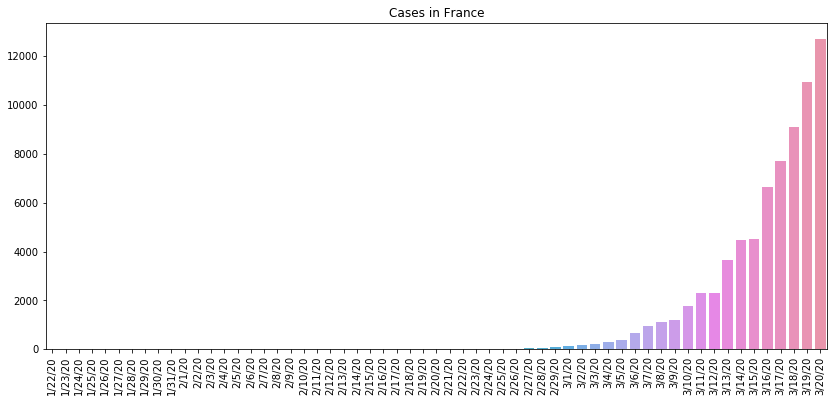

In [12]:
df_france = df_timeseries[df_timeseries['Country/Region'] == 'France']
plot_casecount_by_date(df_france, "Cases in France")

In [13]:
def lineplot_casecounts_by_date(dfs, labels, title='Cases by date. 0 == 2020-01-22'):
    """
    Make a line plot of cases by date, with multiple lines for multiple dataframes
    """
    f, ax = plt.subplots()
    matplotlib.pyplot.xticks(rotation=90)
    
    for i in range(len(dfs)):
        df = dfs[i]
        label = labels[i]
        sums = [df[column].sum() for column in date_columns]
        sns.lineplot(x=range(len(date_columns)), y=sums, ax=ax, label=label)
    ax.set_title(title)
    f.set_size_inches(14,6)

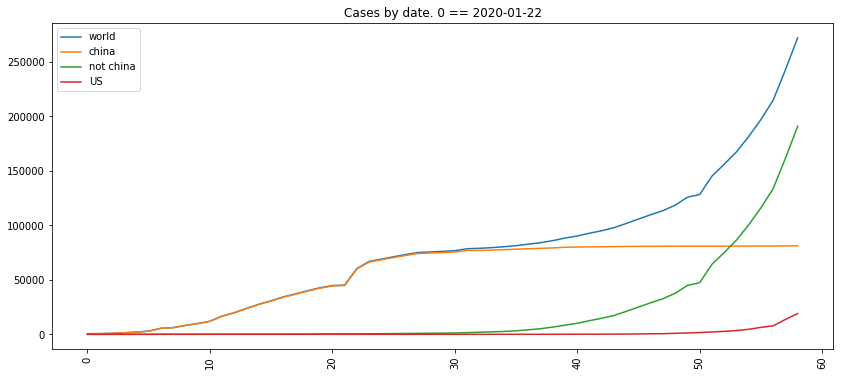

In [14]:
lineplot_casecounts_by_date([df_timeseries, df_china, df_notchina, df_US],
                            ['world', 'china', 'not china', 'US'])

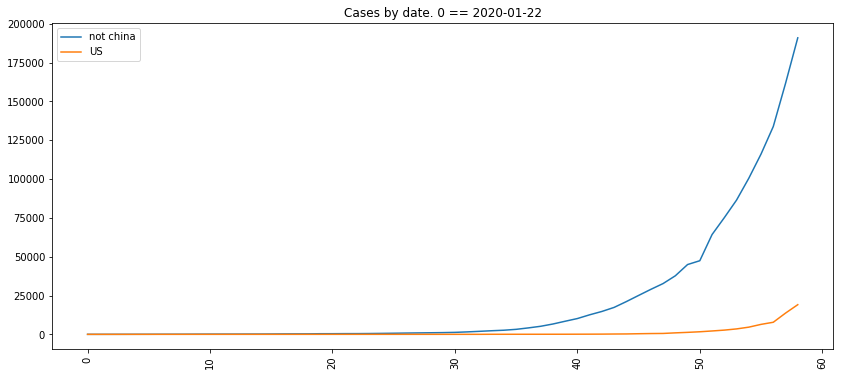

In [15]:
lineplot_casecounts_by_date([df_notchina, df_US],
                            ['not china', 'US'])

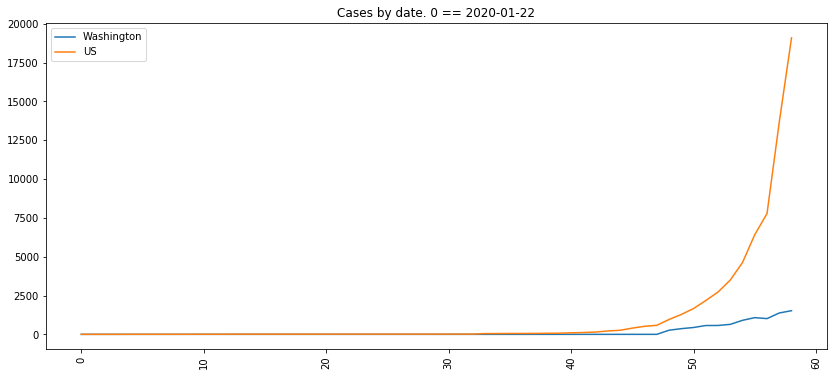

In [29]:
lineplot_casecounts_by_date([df_wa, df_US],
                            ['Washington', 'US'])